In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import torch
from PIL import Image
from torch.utils.data import DataLoader,random_split
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from torchvision.datasets import ImageFolder
import torch.nn.functional as F
import pathlib
from torch import optim
import shutil
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import StepLR
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
import os

def rename_files(directory):
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    files.sort()

    for index, filename in enumerate(files, start=1):
        file_extension = os.path.splitext(filename)[1]

        new_filename = f"{index}{file_extension}"

        old_file_path = os.path.join(directory, filename)
        new_file_path = os.path.join(directory, new_filename)

        os.rename(old_file_path, new_file_path)
        print(f"Renamed: {filename} -> {new_filename}")

directory_path = r"/content/drive/MyDrive/Brain-NoBrain/model1/B"

rename_files(directory_path)

Renamed: IMG-0008-00110.jpg -> 1.jpg
Renamed: IMG-0008-00111.jpg -> 2.jpg
Renamed: IMG-0008-00112.jpg -> 3.jpg
Renamed: IMG-0008-00113.jpg -> 4.jpg
Renamed: IMG-0008-00114.jpg -> 5.jpg
Renamed: IMG-0008-00115.jpg -> 6.jpg
Renamed: IMG-0008-00116.jpg -> 7.jpg
Renamed: IMG-0008-00117.jpg -> 8.jpg
Renamed: IMG-0008-00118.jpg -> 9.jpg
Renamed: IMG-0008-00119.jpg -> 10.jpg
Renamed: IMG-0008-00120.jpg -> 11.jpg
Renamed: IMG-0008-00121.jpg -> 12.jpg
Renamed: IMG-0008-00122.jpg -> 13.jpg
Renamed: IMG-0008-00123.jpg -> 14.jpg
Renamed: IMG-0008-00124.jpg -> 15.jpg
Renamed: IMG-0008-00125.jpg -> 16.jpg
Renamed: IMG-0008-00126.jpg -> 17.jpg
Renamed: IMG-0008-00127.jpg -> 18.jpg
Renamed: IMG-0008-00128.jpg -> 19.jpg
Renamed: IMG-0008-00129.jpg -> 20.jpg
Renamed: IMG-0008-00130.jpg -> 21.jpg
Renamed: IMG-0008-00131.jpg -> 22.jpg
Renamed: IMG-0008-00132.jpg -> 23.jpg
Renamed: IMG-0008-00133.jpg -> 24.jpg
Renamed: IMG-0008-00134.jpg -> 25.jpg
Renamed: IMG-0008-00135.jpg -> 26.jpg
Renamed: IMG-0008-001

In [5]:
import shutil
import os

def copy_files(source_folder, destination_folder):
    # Ensure destination folder exists
    os.makedirs(destination_folder, exist_ok=True)

    # Loop through files in the source folder
    for file_name in os.listdir(source_folder):
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)

        # Check if it's a file (not a directory)
        if os.path.isfile(source_path):
            shutil.copy2(source_path, destination_path)  # Preserve metadata
            print(f"Copied: {file_name} → {destination_folder}")

# Example usage
source_folder = "/content/drive/MyDrive/Brain-NoBrain/model1/NB"
destination_folder = "/content/drive/MyDrive/Brain-NoBrain/model1/NoBrain"

copy_files(source_folder, destination_folder)


Copied: 227.jpg → /content/drive/MyDrive/Brain-NoBrain/model1/NoBrain
Copied: 153.jpg → /content/drive/MyDrive/Brain-NoBrain/model1/NoBrain
Copied: 224.jpg → /content/drive/MyDrive/Brain-NoBrain/model1/NoBrain
Copied: 199.jpg → /content/drive/MyDrive/Brain-NoBrain/model1/NoBrain
Copied: 150.jpg → /content/drive/MyDrive/Brain-NoBrain/model1/NoBrain
Copied: 246.jpg → /content/drive/MyDrive/Brain-NoBrain/model1/NoBrain
Copied: 186.jpg → /content/drive/MyDrive/Brain-NoBrain/model1/NoBrain
Copied: 173.jpg → /content/drive/MyDrive/Brain-NoBrain/model1/NoBrain
Copied: 182.jpg → /content/drive/MyDrive/Brain-NoBrain/model1/NoBrain
Copied: 196.jpg → /content/drive/MyDrive/Brain-NoBrain/model1/NoBrain
Copied: 230.jpg → /content/drive/MyDrive/Brain-NoBrain/model1/NoBrain
Copied: 181.jpg → /content/drive/MyDrive/Brain-NoBrain/model1/NoBrain
Copied: 176.jpg → /content/drive/MyDrive/Brain-NoBrain/model1/NoBrain
Copied: 244.jpg → /content/drive/MyDrive/Brain-NoBrain/model1/NoBrain
Copied: 160.jpg → /c

In [7]:
import os
import cv2

path= r"/content/drive/MyDrive/Brain-NoBrain/model1/NoBrain"
cropped_path= r"/content/drive/MyDrive/Brain-NoBrain/model1/NoBrainCropped"
x, y, width, height = 0, 0, 326, 425
img=[f for f in os.listdir(path)]
os.makedirs(cropped_path, exist_ok=True)
for i in img:
    img_path=os.path.join(path,i)
    cropped_img=cv2.imread(img_path)[y:y + height, x:x + width]
    cv2.imwrite(os.path.join(cropped_path, i), cropped_img)

In [17]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
dataset_path = r"/content/drive/MyDrive/Brain-NoBrain/model1"
output_path = r"/content/drive/MyDrive/Brain-NoBrain/model1/Brain-NoBrain_AugmentedBalanced"

# Ensure output directory exists
os.makedirs(output_path, exist_ok=True)

# Define augmentation for NoBrain (stronger to generate more images)
nobrain_aug = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=[0.85, 1.1],
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant'
)

# Count existing images in NoBrain
nobrain_folder = os.path.join(dataset_path, "NoBrain")
nobrain_images = [f for f in os.listdir(nobrain_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Output folder for NoBrain
output_nobrain = os.path.join(output_path, "NoBrain")
os.makedirs(output_nobrain, exist_ok=True)

# Number of extra images needed
needed_images = 3171 - len(nobrain_images)

# Augment NoBrain images
i = 0
while i < needed_images:
    for img_name in nobrain_images:
        img_path = os.path.join(nobrain_folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.expand_dims(img, axis=0)  # Expand dimensions

        aug_iter = nobrain_aug.flow(img, batch_size=1)
        aug_img = next(aug_iter)[0].astype(np.uint8)
        aug_img = cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)
        aug_img_name = f"aug_{i}_{img_name}"

        cv2.imwrite(os.path.join(output_nobrain, aug_img_name), aug_img)
        i += 1
        if i >= needed_images:
            break

print("✅ NoBrain class balanced with Brain class!")


✅ NoBrain class balanced with Brain class!


In [18]:
import os

# Path to the augmented dataset
augmented_data_path = r"/content/drive/MyDrive/Brain-NoBrain/model1/Brain-NoBrain_AugmentedBalanced"

# Class names (Brain and NoBrain)
classes = ["Brain", "NoBrain"]

# Count files in each class
for class_name in classes:
    class_path = os.path.join(augmented_data_path, class_name)
    num_files = len([f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
    print(f"Class '{class_name}': {num_files} images")


Class 'Brain': 3171 images
Class 'NoBrain': 3171 images


In [19]:
from torchvision import transforms
from torch.utils.data import random_split, DataLoader

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

data_dir = r"/content/drive/MyDrive/Brain-NoBrain/model1/Brain-NoBrain_AugmentedBalanced"
dataset = ImageFolder(root=data_dir, transform=transform)

train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class_names = dataset.classes
print("Classes:", class_names)

Classes: ['Brain', 'NoBrain']


In [21]:
import torch
import torch.nn as nn

class CNNmodel(nn.Module):
    def __init__(self):
        super(CNNmodel, self).__init__()
        # 1 Conv2d
        self.cnv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0)
        # 1 Max Pool2d
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        # 2 Conv2d
        self.cnv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        # 2 Max Pool2d
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        # 3 Conv2d
        self.cnv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=0)
        # 3 Max Pool2d
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        # 4 Conv2d
        self.cnv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=0)
        # 4 Max Pool2d
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)
        # Activation function
        self.leakyRelu = nn.LeakyReLU(negative_slope=0.01)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 1024)
        self.dropout1 = nn.Dropout(0.5)  # Dropout layer (50% dropout rate)
        self.fc2 = nn.Linear(1024, 2)

    def forward(self, x):
        # (1) First layer
        out = self.leakyRelu(self.cnv1(x))
        out = self.maxpool1(out)
        # (2) Second layer
        out = self.leakyRelu(self.cnv2(out))
        out = self.maxpool2(out)
        # (3) Third layer
        out = self.leakyRelu(self.cnv3(out))
        out = self.maxpool3(out)
        # (4) Fourth layer
        out = self.leakyRelu(self.cnv4(out))
        out = self.maxpool4(out)

        out = out.view(out.size(0), -1)

        # Fully connected layers with dropout
        out = self.leakyRelu(self.fc1(out))
        out = self.dropout1(out)  # Apply dropout after the first fully connected layer
        out = self.fc2(out)

        return out


In [22]:
CNNmodel().forward

<bound method CNNmodel.forward of CNNmodel(
  (cnv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnv4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (leakyRelu): LeakyReLU(negative_slope=0.01)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1024, out_features=2, bias=True)
)>

In [23]:
train_loss_list = []
val_loss_list = []
val_accuracy_list = []
train_accuracy_list = []

epochs=10
model=CNNmodel()
error=nn.CrossEntropyLoss() #loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)#optimizer
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)#Learning rate scheduler

for epoch in range(epochs):
    train_loss = 0
    val_loss = 0
    train_total = 0
    train_correct =0
    model.train()  # Set model to training mode
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = error(outputs, labels)
        train_loss += loss.item()
        #train accuracy
        predicted = torch.max(outputs.data, 1)[1]
        train_total += len(labels)
        train_correct += (predicted == labels).sum().item()

        loss.backward()
        optimizer.step()

    model.eval()  # Set model to Validation mode
    total = 0
    correct = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            v_loss = error(outputs, labels)
            val_loss += v_loss.item()
            predicted = torch.max(outputs.data, 1)[1]
            total += len(labels)
            correct += (predicted == labels).sum().item()  # Convert tensor to scalar

    # Update scheduler
    scheduler.step()

    val_accuracy = 100 * correct / total
    train_accuracy = 100 * train_correct / train_total

    train_loss_list.append(train_loss / len(train_loader))
    train_accuracy_list.append(train_accuracy)
    val_loss_list.append(val_loss / len(val_loader))
    val_accuracy_list.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, "
          f"Train Loss: {train_loss / len(train_loader):.4f}, "
          f"Val Loss: {val_loss / len(val_loader):.4f}, "
          f"Train Accuracy: {train_accuracy:.2f}%",
          f"Validation Accuracy: {val_accuracy:.2f}%")

Epoch 1/10, Train Loss: 0.2979, Val Loss: 0.2847, Train Accuracy: 88.36% Validation Accuracy: 88.09%
Epoch 2/10, Train Loss: 0.1820, Val Loss: 0.1580, Train Accuracy: 93.14% Validation Accuracy: 94.16%
Epoch 3/10, Train Loss: 0.1442, Val Loss: 0.1457, Train Accuracy: 94.38% Validation Accuracy: 95.03%
Epoch 4/10, Train Loss: 0.1417, Val Loss: 0.1468, Train Accuracy: 94.64% Validation Accuracy: 94.32%
Epoch 5/10, Train Loss: 0.1230, Val Loss: 0.1270, Train Accuracy: 95.56% Validation Accuracy: 95.35%
Epoch 6/10, Train Loss: 0.1043, Val Loss: 0.1097, Train Accuracy: 95.80% Validation Accuracy: 95.66%
Epoch 7/10, Train Loss: 0.0934, Val Loss: 0.1037, Train Accuracy: 96.06% Validation Accuracy: 96.53%
Epoch 8/10, Train Loss: 0.0892, Val Loss: 0.1017, Train Accuracy: 96.16% Validation Accuracy: 96.53%
Epoch 9/10, Train Loss: 0.0871, Val Loss: 0.0995, Train Accuracy: 96.50% Validation Accuracy: 96.69%
Epoch 10/10, Train Loss: 0.0857, Val Loss: 0.1000, Train Accuracy: 96.56% Validation Accura

In [24]:
if not os.path.exists(r"/content/drive/MyDrive/Brain-NoBrain/model1/model"):
    os.makedirs(r"/content/drive/MyDrive/Brain-NoBrain/model1/model")

torch.save(model.state_dict(), r"/content/drive/MyDrive/Brain-NoBrain/model1/model/detectionModel.pth")

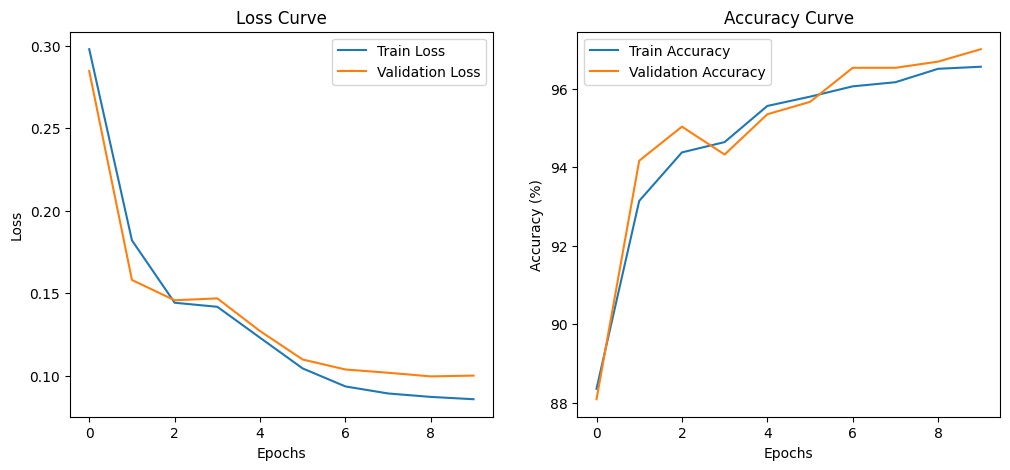

In [25]:
import matplotlib.pyplot as plt

# Plot loss curves
plt.figure(figsize=(12, 5))

# Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label="Train Loss")
plt.plot(val_loss_list, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list, label="Train Accuracy")
plt.plot(val_accuracy_list, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Curve")
plt.legend()

plt.show()

In [26]:
model.load_state_dict(torch.load(r"/content/drive/MyDrive/Brain-NoBrain/model1/model/detectionModel.pth"))
model.eval()
test_loss = 0.0
test_correct = 0
test_total = 0
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        loss = error(outputs, labels)
        test_loss += loss.item()

        predicted = torch.max(outputs, 1)[1]
        test_total += len(labels)
        test_correct += (predicted == labels).sum().item()

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

test_accuracy = 100 * test_correct / test_total
print(f"Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%")

<ipython-input-26-40eb2a5646b9>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(r"/content/drive/MyDrive/Brain-NoBrain/model1/model/detecti

Test Loss: 0.1320, Test Accuracy: 95.04%


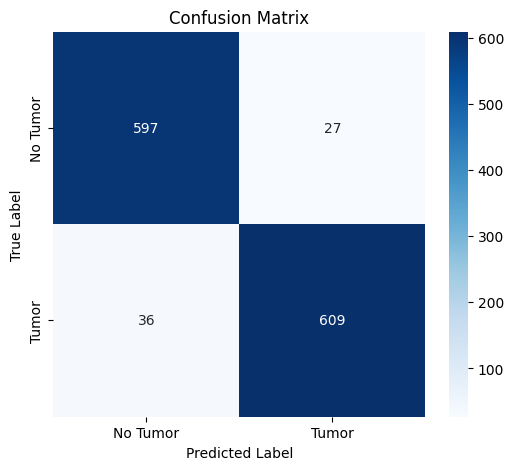

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()